In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
data=pd.read_csv("trndata.csv")

In [15]:
data.shape

(1000, 13)

In [6]:
x=data.iloc[:,:-1]

In [8]:
x.head(3)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12
0,0.3315,0.2156,0.6802,0.1434,0.6825,0.2720,0.6223,0.2092,0.7961,0.1530,0.5856,0.2573
1,0.0939,1.0089,0.0365,0.6944,0.0908,0.4961,0.0722,0.6521,-0.0130,0.6085,0.0631,0.6597
2,0.5184,0.2283,0.5300,0.6884,0.7456,0.6171,0.6136,0.5928,0.7678,0.6130,0.6705,0.5202


In [11]:
y=data['L']

In [13]:
y.head(3)

0    1
1    2
2    1
Name: L, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [17]:
x_train.shape,y_train.shape

((700, 12), (700,))

In [18]:
x_test.shape,y_test.shape

((300, 12), (300,))

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn=KNeighborsClassifier(n_neighbors=5)

In [22]:
knn=knn.fit(x_train,y_train)

In [23]:
y_pred=knn.predict(x_test)

In [24]:
from sklearn import metrics

In [32]:
metrics.confusion_matrix(y_test,y_pred)

array([[119,   0,   0],
       [  1,  81,   0],
       [  0,   0,  99]], dtype=int64)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       119
           2       1.00      0.99      0.99        82
           3       1.00      1.00      1.00        99

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [48]:
error_rate=[]
n=40

for i in range(1,40):
    knn1=KNeighborsClassifier(n_neighbors=i)
    knn1=knn1.fit(x_train,y_train)
    y_pred1=knn1.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

Text(0, 0.5, 'Error Rate')

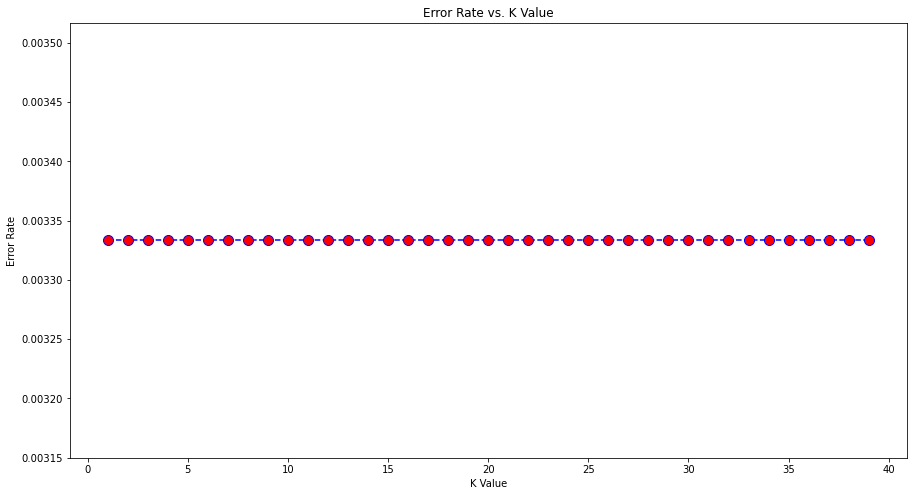

In [51]:
plt.figure(figsize=(15,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')